## Parte 1

##Aqui importaremos librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as clrs
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

%matplotlib notebook


In [2]:
## Se agrega el DataFrame que se trabajará en la actividad
## Se le da el nombre de "df"
df = pd.read_csv('celulares.csv',sep=",")
## Se desprende que la cantidad de filas y columnas que tenemos en dicha DataFrame = df son 2200 rows y 22 columns
df=df.dropna()
## Mediante el comando df.dropna() se eliminaron todas las filas que contuvieran valores nulos del data frame, 
## esto debido a que no se le puede atribuir un valor en especifico y sin ello, nosotros no podemos ver como va influir en la prediccion.
## Por otro lado, por ejemplo, en caso de que los componentes que tienen valores NAN sean de gama baja o muy baja, 
## esto podria aumentar el presupuesto para los demas componentes, con lo cual, se dañaria el dataframe.
df

,Unnamed: 0,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1663.0,1.0,2.5,1.0,13.0,1.0,27.0,0.3,169.0,...,831.0,1439.0,2084.0,7.0,1.0,18.0,1.0,0.0,0.0,2.0
1,1,1663.0,1.0,0.5,0.0,0.0,0.0,40.0,0.6,147.0,...,951.0,1545.0,1336.0,8.0,5.0,15.0,1.0,0.0,0.0,1.0
2,2,1323.0,1.0,2.5,1.0,10.0,1.0,28.0,0.2,131.0,...,162.0,619.0,1892.0,10.0,0.0,15.0,1.0,1.0,1.0,1.0
3,3,1099.0,0.0,0.5,0.0,13.0,1.0,61.0,0.3,146.0,...,393.0,1096.0,1699.0,17.0,10.0,3.0,1.0,1.0,1.0,1.0
4,4,1563.0,0.0,1.7,1.0,10.0,0.0,16.0,0.1,151.0,...,410.0,572.0,3922.0,11.0,1.0,8.0,0.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2195,1867.0,0.0,2.3,0.0,0.0,1.0,9.0,0.1,191.0,...,712.0,1442.0,990.0,6.0,1.0,2.0,1.0,0.0,1.0,1.0
2196,2196,541.0,1.0,2.3,0.0,4.0,0.0,51.0,0.4,200.0,...,1012.0,1226.0,403.0,11.0,2.0,12.0,0.0,0.0,0.0,0.0
2197,2197,1814.0,0.0,1.4,1.0,1.0,1.0,9.0,0.4,141.0,...,756.0,786.0,3556.0,18.0,12.0,16.0,1.0,0.0,0.0,3.0
2198,2198,1027.0,1.0,2.2,0.0,0.0,0.0,63.0,0.8,102.0,...,152.0,714.0,1732.0,8.0,5.0,13.0,0.0,1.0,1.0,1.0


In [3]:
df[['battery_power','pc','px_width','ram','three_g','wifi','price_range']].groupby("price_range").describe()

battery_power                                                \
                    count      mean         std    min      25%     50%   
price_range                                                               
0.0                 500.0  1116.902  410.801305  503.0   770.50  1066.0   
1.0                 500.0  1228.868  438.614528  501.0   843.00  1206.0   
2.0                 500.0  1228.320  452.863065  501.0   816.50  1219.5   
3.0                 500.0  1379.984  414.992261  503.0  1034.75  1449.5   

                                 pc          ... three_g        wifi         \
                 75%     max  count    mean  ...     75%  max  count   mean   
price_range                                  ...                              
0.0          1431.25  1994.0  500.0   9.574  ...     1.0  1.0  500.0  0.496   
1.0          1596.25  1996.0  500.0   9.924  ...     1.0  1.0  500.0  0.504   
2.0          1635.75  1998.0  500.0  10.018  ...     1.0  1.0  500.0  0.504   
3.0          1733.50  1994.0  500.0  10.150  ...     1.0  1.0  500.0  0.524   

                                                
                  std  min  25%  50%  75%  max  
price_range                                     
0.0          0.500485  0.0  0.0  0.0  1.0  1.0  
1.0          0.500485  0.0  0.0  1.0  1.0  1.0  
2.0          0.500485  0.0  0.0  1.0  1.0  1.0  
3.0          0.499924  0.0  0.0  1.0  1.0  1.0  

[4 rows x 48 columns]

**No influiran en la prediccion**

*   unnamed --> No se toma en cuenta debido a que no aporta ninguna diferencia al momento de clasificar y poder hacer la selección.
* Blue --> No se toma en cuenta debido a que los promedios generaban ciertas inconsistencias en cada rango de precio, es decir, el promedio de celulares con bluetooth en el rango de precio 1.0 es mas alto que el promedio de celulares con bluetooth en el rango de precio 2.0. Por otro lado, vemos que al menos el 25% de los celulares de todos los rangos de precios poseen bluetooth, por lo que el tener o no bluetooth no parece ser una metrica confiable para predecir el rango de precio.
* clock_speed --> No se tomará en cuenta, puesto que, las mayores velocidades de ejecución de tareas por parte del procesador, los tienen aquellos ubicados en el rango de precio 0.0. Por otro lado, podemos ver que el promedio es inconsistente, pues, no es descendente ni ascendente en cuanto al rango de precio.
* dual_sim --> No se tomara en cuenta debido a la inconsistencia que presentan los promedios en el rango de precios 1.0 y 2.0, esto, a causa de que hay mas celulares que poseen dual_sim en el rango de precio 1.0 que en el rango de precio 2.0. 
* fc --> Esta caracteristica no sera tomada en cuenta debido a que el promedio no es consistente con la tendencia que presenta el precio. Ademas, tenemos que en el rango de precio 0.0, hay un celular con 19 megapixeles en la camara frontal, el cual, es un maximo global, pasando asi, a los celulares de mayor rango de precio. 
* four_g --> Se eliminara debido a la falta de congruencia en los promedios (lo cual, se observa al pasar del rango de precio 1.0 al rango de precio 2.0).
* m_dep --> No sera tomado en cuenta debido a que derechamente es inconsistente con la tendencia de los rangos de precios. Probablemente esto sea debido a que los anchos de los celulares en su mayoria son los mismos.
* mobile_wt --> Tampoco sera tomado en cuenta, pues, el rango de precio 2.0 rompe con la tendencia general que habia en el peso de los dispositivos, por lo que, los datos dañarian la capacidad de prediccion.
* n_cores --> Estos no se tomaran en cuenta debido a que presentan una distribucion practicamente al azar, por lo que, solo dañarian la prediccion.
* px_height --> Muestra inconsistencia con la tendencia de los precios, por lo cual, no se toma en cuenta.
* sc_h --> No se tomara en cuenta, pues, segun parece, el alto de la pantalla disminuye a medida que aumenta el precio del celular desde el rango 0.0 al rango 2.0, sin embargo, vemos que los celulares del rango de precio 3.0 rompen con esta tendencia, por lo cual, podria conducir a errores.
* sc_w --> No sera tomado en cuenta debido a que presenta incongruencia en el rango de precio 1.0.
* talk_time --> No se tomara como caracteristica para predecir debido a que presenta una distribucion relativamente al azar.
* touch_screen --> No se tomara como caracteristica pues, no parece tener una tendencia general, por lo cual, no aportaria mucha informacion valiosa para la prediccion.


**Dejar**

*   Battery_power -->  Este dato se tomara en cuenta debido a que, el promedio parece tener cierta congruencia con los rangos de precios, es decir, a medida que aumenta el poder de la bateria, tiende a aumentar el precio del celular. Esto se puede ver reflejado en el promedio, en el 50% y en el 75% del describe.
*   pc --> Este dato sera tomado en cuenta, pues, posee una distribucion uniforme y acorde a la tendencia que presentan los precios.
* px_width --> Se tomara en cuenta, pues, debido a que presenta cierta incongruencia con la tendencia de los precios, es minima, por lo cual, en general, aportara informacion valiosa para la prediccion.
* ram --> La ram es totalmente congruente con la tendencia de los precios, por lo cual, se utilizara como caracteristica para predecir los rangos de precios.
* three_g -->Este se utilizara como caracteristica para predecir los rangos de precios, debido a que a pesar de presentar cierta incongruencia en el rango de precio 3.0 , en general va acorde con la tendencia de estos.
* wifi -->A pesar de presentar un promedio similar en el rango de precio 1.0 y en el rango de precio 2.0, en general, presenta una tendencia al aumento junto a los rangos de precios.
* price_range --> sera el criterio en base al cual se hara la clasificacion.
* int_memory --> Este se dejara, pues, se usara como criterio base para la regresion.

In [4]:
seleccion_df=df[['battery_power','pc','px_width','int_memory','ram','three_g','wifi','price_range']]
seleccion_df
seleccion_dfint=df[['battery_power','pc','px_width','ram','three_g','wifi','int_memory']]

<IPython.core.display.Javascript object>


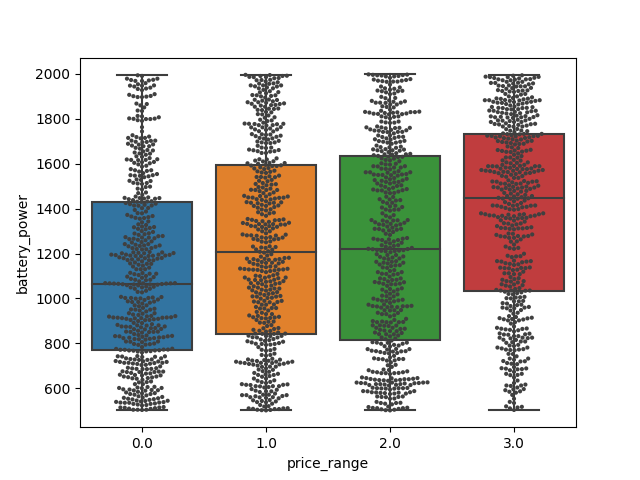

In [7]:
ax6 = sns.boxplot(x="price_range", y="battery_power", data=seleccion_df)
ax6 = sns.swarmplot(x="price_range", y="battery_power", data=seleccion_df, color=".25",size=3)

### En este grafico se relaciona el poder de bateria con el rango de precio. Cada cajita tiene una linea, la cual es el promedio de poder de bateria en cada rango de precio, por lo tanto, podemos que ver que el promedio aproximado de poder de bateria en los rangos de precios 0.0, 1.0, 2.0 y 3.0, son 1050, 1200, 1210 y 1450, respectivamente. En consecuencia a los datos dados anteriormente, tenemos que hay una correlacion positiva entre ambas caracteristicas, es decir, a medida que aumenta el rango de precio, aumenta asi mismo el poder de bateria.

In [5]:
seleccion_df1=seleccion_df[(seleccion_df['wifi']==0.0)]
seleccion_df1.groupby('price_range').count()

,battery_power,pc,px_width,int_memory,ram,three_g,wifi
price_range,,,,,,,
0.0,252,252,252,252,252,252,252
1.0,248,248,248,248,248,248,248
2.0,248,248,248,248,248,248,248
3.0,238,238,238,238,238,238,238


In [6]:
seleccion_df2=seleccion_df[(seleccion_df['wifi']==1.0)]
seleccion_df2.groupby('price_range').count()

,battery_power,pc,px_width,int_memory,ram,three_g,wifi
price_range,,,,,,,
0.0,248,248,248,248,248,248,248
1.0,252,252,252,252,252,252,252
2.0,252,252,252,252,252,252,252
3.0,262,262,262,262,262,262,262


<IPython.core.display.Javascript object>


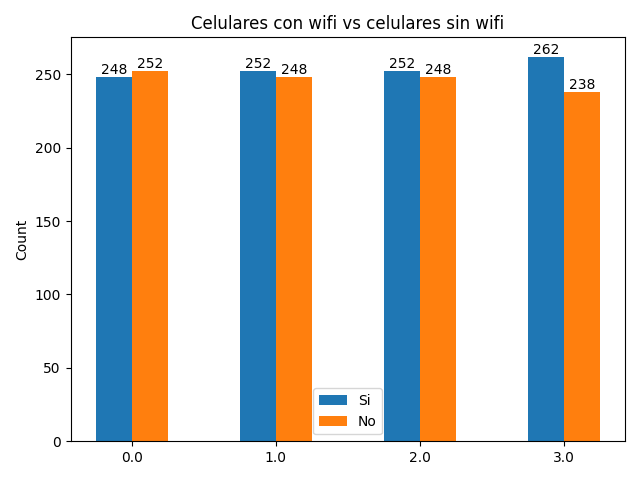

In [18]:
labels = ['0.0', '1.0', '2.0', '3.0'] #Ponemos los rangos de precios en las etiquetas del grafico, las cuales se ubican en el eje x
Si = [248, 252, 252, 262] #Se establecen los valores de celulares que tienen wifi
No= [252, 248, 248, 238] #Se establecen los valores de celulares que no tienen wifi

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots() #Hace posible que hayan dos barras para poder comparar el si y el no
rects1 = ax.bar(x - width/2, Si, width, label='Si') #Genera la barra que se utilizara para los que tienen wifi
rects2 = ax.bar(x + width/2, No, width, label='No') #Genera la barra que se utilizara para los que no tienen wifi

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count') #Etiqueta eje y
ax.set_title('Celulares con wifi vs celulares sin wifi') #Titulo del grafico #
ax.set_xticks(x) #Cuadra eje x con las etiquetas
ax.set_xticklabels(labels) #Se ponen las etiquetas en el eje x
ax.legend() #Cartelito de si y no

ax.bar_label(rects1, padding=0) #Cantidad de celulares que tienen wifi
ax.bar_label(rects2, padding=0) #Cantidad de celulares que no tienen wifi
 
    
fig.tight_layout() #Cuadra el cartelito de acuerdo a la ubicacion del grafico

plt.show() #muestra el grafico

### Este grafico nos muestra como se distribuyen la cantidad de celulares que si tienen wifi y los que no tienen wifi segun el rango de precio. Es decir, en los rangos de precio 0.0, 1.0, 2.0 y 3.0 hay 248, 252, 252 y 262 celulares que tienen wifi, respectivamente. Por otro lado, en los rangos de precio 0.0, 1.0, 2.0, 3.0 hay 252, 248, 248 y 238 celulares que no tienen wifi, respectivamente. Debido a lo anteriormente mencionado, podemos ver que la cantidad de celulares con wifi es congruente con los rangos de precios, pues, a medida que aumenta el rango de precio, tiende  a aumentar la cantidad de celulares con wifi.

## Idea de grafico extraida de 
## https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

In [9]:
seleccion_df1=seleccion_df[(seleccion_df['three_g']==1.0)]
seleccion_df1.groupby('price_range').count()

,battery_power,pc,px_width,int_memory,ram,three_g,wifi
price_range,,,,,,,
0.0,373,373,373,373,373,373,373
1.0,378,378,378,378,378,378,378
2.0,387,387,387,387,387,387,387
3.0,385,385,385,385,385,385,385


In [10]:
seleccion_df1=seleccion_df[(seleccion_df['three_g']==0.0)]
seleccion_df1.groupby('price_range').count()

,battery_power,pc,px_width,int_memory,ram,three_g,wifi
price_range,,,,,,,
0.0,127,127,127,127,127,127,127
1.0,122,122,122,122,122,122,122
2.0,113,113,113,113,113,113,113
3.0,115,115,115,115,115,115,115


<IPython.core.display.Javascript object>


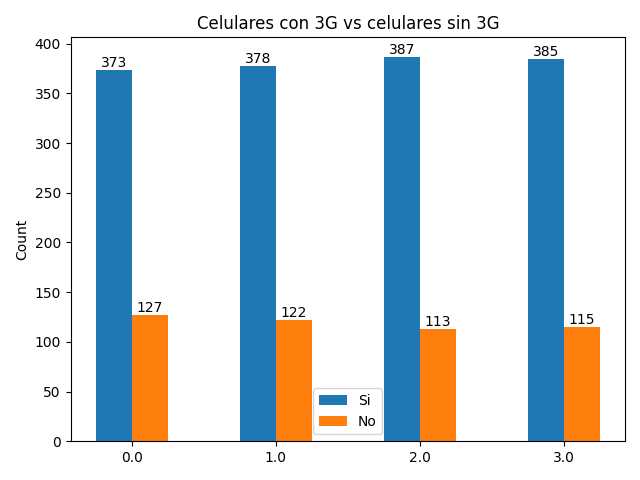

In [14]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['0.0', '1.0', '2.0', '3.0']
Si = [373, 378, 387, 385]
No= [127, 122, 113, 115]

x5 = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax1 = plt.subplots()
rects1 = ax1.bar(x5 - width/2, Si, width, label='Si')
rects2 = ax1.bar(x5 + width/2, No, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Count')
ax1.set_title('Celulares con 3G vs celulares sin 3G')
ax1.set_xticks(x5)
ax1.set_xticklabels(labels)
ax1.legend()

ax1.bar_label(rects1, padding=0)
ax1.bar_label(rects2, padding=0)

fig.tight_layout()

plt.show()

### En este grafico podemos ver que, en los de precios 0.0, 1.0, 2.0 y 3.0, la cantidad de celulares con 3g son 373, 378, 387 y 385, respectivamente. Por otro lado, en esos mismos rangos de precios, tenemos que hay 127, 122, 113 y 115 celulares sin 3g, respectivamente. Por lo cual, podemos ver que hay cierta incongruencia en ambas tendencias, pues, la cantidad de celulares con 3g no siempre aumenta a medida que aumenta el rango de precio, sin embargo, la incongruencia es minima, por lo que de igual manera, se dejo este criterio.

<IPython.core.display.Javascript object>


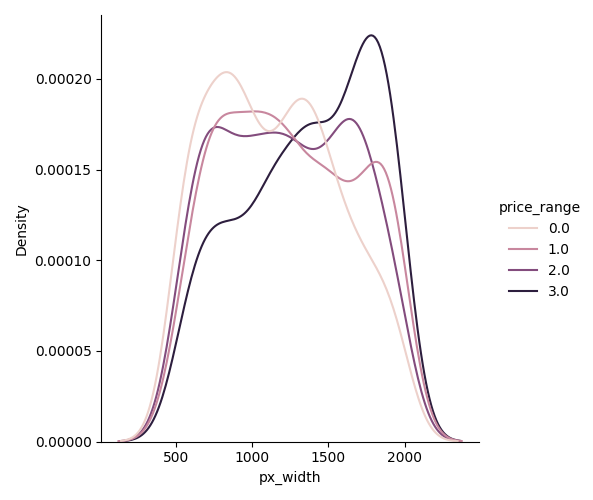

In [12]:
sns.displot(data=seleccion_df, x="px_width", hue="price_range", kind="kde")

### Como se logra ver en este grafico, en primer lugar, en el rango 0.0, hay una gran cantidad de celulares con aproximadamente 750 y 1300 pixeles de ancho de camara. En segundo lugar, tenemos que en el rango 1.0, hay una gran cantidad de celulares con 750, 1200 y 1750 pixeles de ancho de camara. Luego, en el rango 2.0, tenemos que hay una gran cantidad de celulares con aproximadamente 750 y 1600 pixeles de ancho. Finalmente, tenemos que en el rango de precio 3.0 hay una gran cantidad de celulares con aproximadamente, 1800 pixeles de ancho en camara. 
### Por otro lado, podemos ver los datos en general parecen seguir cierta tendencia, en la cual, al aumentar el precio, en general aumenta el ancho de resolucion en pixeles.

<IPython.core.display.Javascript object>


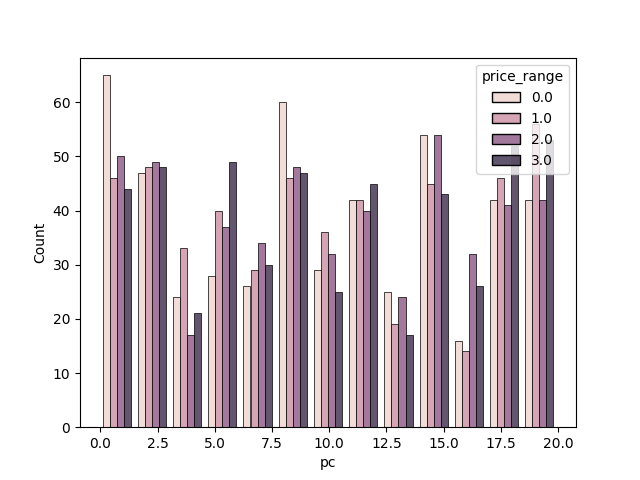

<AxesSubplot:xlabel='pc', ylabel='Count'>

In [16]:
graph1=sns.histplot(data=seleccion_df, x="pc", hue="price_range", multiple="dodge", shrink=.8, legend=True)
graph1

### La presente grafica, enfrenta la cantidad celulares versus la cantidad de pixeles que posee su camara pincipal, distinguiendo la su rango de precio de 0.0 la mayoria de los celulares se encuentra por debajo de encontrando sus picos por debajo de los 20 pixeles. En el rango de precio 1.0 encontramos como se mantiende, y tiende a tener una leve subida en cuanto se va aumentando su cantidad de pixeles. El rango de precio 2.0 es muy parecido al anterior no obstante tiene la tendencia subir con aun mas cantidad de pixeles. Por ultimo encontramos el rango de precio 3.0 que en su mayoria encontramos que la camara principal tiene 20 pixeles y es aqui donde se encuentra la mayoria de celulares.

<IPython.core.display.Javascript object>


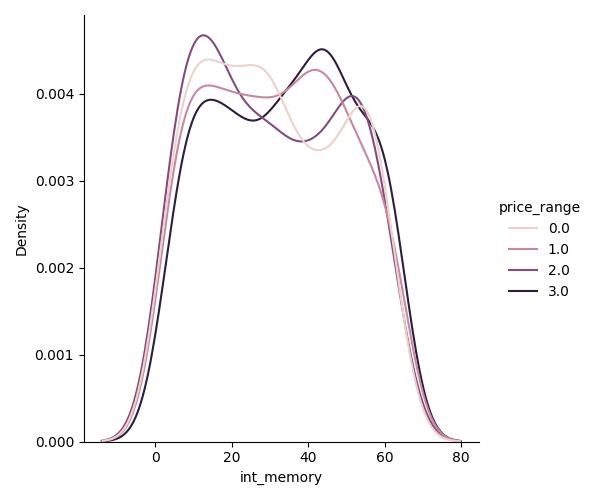

In [17]:
sns.displot(data=seleccion_df, x="int_memory", hue="price_range", kind="kde")

### En la grafica anterior podemos apreciar como la memoria interna de un celular va a variar segun el rango de precio que tenga, en primera instancia se puede observar que en el rango de precio 0.0 la cantidad de memoria interna en su mayoria esta por debajo de los 20GB  y cada vez se dismunye más llegando a una baja cada vez que aumentamos la memoria. Luego tenemos que la cantidad de memoria interna en los celulares con rango de precio 1.0 se mantiene entre los 16 y 32GB, para posteriormente tenga un descenso. Llegando asi al precio de rango 2.0 en donde se pueden apreciar dos picos importantes en prier lugar en los de 16GB y luego llegando a los 60 GB siendo este ultimo pico, mucho menr que el anterior mencionado. Finalmente nos encontramos con el rango de precio más caro que es el de 3.0, donde el pico más importante lo encontramos superior a los 40GB de memoria interna.

sns.set_theme(style="whitegrid")
sns.stripplot(data=seleccion_df, x="ram", y="price_range")
plt.xticks(rotation=90)

# Comentar

## A continuacion, a traves del comando seleccion_df['battery_power'].unique() se busco cuales eran los datos unicos de la columna battery_power en el data frame "seleccion_df", esto para asegurarnos de que no hubieran strings que interfirieran al momento de clasificar.
### Para los siguientes, se realizo el mismo proceso, por lo que, creemos seria redundante volver a explicarlo.

In [ ]:
seleccion_df['battery_power'].unique()

In [ ]:
seleccion_df['ram'].unique()

In [ ]:
seleccion_df['px_width'].unique()

In [ ]:
seleccion_df['pc'].unique()

In [ ]:
seleccion_df['int_memory'].unique()

In [ ]:
seleccion_df['three_g'].unique()

In [ ]:
seleccion_df['wifi'].unique()

In [ ]:
seleccion_df

### Se crea un nuevo dataframe, esta vez sin tomar en cuenta el price_range.

In [ ]:
seleccion_dfint

### Como buscamos clasificar cuales son los rangos de precios de cada celular segun sus especificaciones, mediante el comando "seleccion_df.iloc[:,:7]" se separaron las caracteristicas de los celulares del rango de precio.

In [ ]:
seleccion_df.iloc[:,:7]

#### Luego, mediante el comando "seleccion_df.iloc[:,7]", se tomo en cuenta los rangos de precios de todas las filas para poder asi, clasificar de manera posterior.

In [ ]:
seleccion_df.iloc[:,7]

### Vector de clasificacion

In [ ]:
x= seleccion_df.iloc[:,:7]
y1= seleccion_df.iloc[:,7]
x.shape
x

#### Mediante el comando x.shape, se busco que de que tamaño habia quedado finalmente el conjunto x.

### Vector de regresion

In [ ]:
seleccion_dfint.iloc[:,:6]

In [ ]:
seleccion_dfint.iloc[:,6]

### Como se logra ver, en el dataframe "seleccion_dfint" en el que se encuentran todos los features de "seleccion_df" menos price_range, generamos una separacion, para asi, poder dar lugar a la regresion.
### Hicimos una separacion entre memoria interna del celular y los otros atributos como power_battery, three_g, ram, pc, px_width y wifi.

In [ ]:
x_reg= seleccion_dfint.iloc[:,:6]
y_reg= seleccion_dfint.iloc[:,6]
x_reg.shape

### Con el comando escrito a continuacion, se normalizaron los valores tanto del conjunto x y el conjunto x_reg, donde en el primero se tomaban  power_battery, three_g, ram, pc, px_width, wifi e int_memory. Mientras que en el segundo se tomaban  power_battery, three_g, ram, pc, px_width y wifi.

In [ ]:
## El standard busca normalizar los valores, tomando una muestra de una
## columna x, y restandole el promedio de los valores de esa columna.
## Posteriormente, el resultado de eso, sera dividido por la
## desviacion estandar de esa columna.
## Por otro lado, el fit calcula la media y desviacion estandar, 
## para ser utilizada posteriormente para escalar. 
## Y el transform, utiliza los datos obtenidos del fit, para asi, poder normalizar.
## Por ultimo, el fit_transform hace ambas de una vez.
x = StandardScaler().fit_transform(x) 
x_reg = StandardScaler().fit_transform(x_reg)

# PARTE 2

In [ ]:
X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba = train_test_split(x,y1, test_size=0.20)

### Mediante el comando escrito anteriormente, se definen 4 variables, donde X_entrenamiento e Y_entrenamiento son los que se usaran para entrenar (en los cuales tendremos aproximadamente el 80% de cada grupo de datos), mientras que X_prueba e Y_prueba se usaran para testear(en los cuales tendremos aproximadamente el 20% de cada grupo de datos).

In [ ]:
Gaussian_NB= GaussianNB()

### Se establece como "Gaussian_NB" al metodo de prediccion de Naive Bayes o GaussianNB.
### Se utilizará el clasificador Naive Bayes, en especifico el Gaussian, por 3 motivos principalmente, en primera instancia este clasificador funciona de gran manera para trabajar con caracteristicas independientes entre si, como lo son las caracteristicas de los celulares. Por otro lado,  tenemos el tiempo, Naive Bayes Gaussian nos permite tener una gran eficacia para tratar con una cantidad limitada de datos, y, por ultimo este es un metodo que nos permite entender de manera relativamente facil los resultados.

In [ ]:
Gaussian_NB.fit(X_entrenamiento, Y_entrenamiento)

#### Se ajustan el GaussianNB a los datos de entrenamiento X_entrenamiento e Y_entrenamiento.

In [ ]:
y_pred = Gaussian_NB.predict(X_prueba)

#### A traves del ajuste de GaussianNB, se prueba e intenta predecir los rangos de precios que tendran celulares segun diversas caracteristicas.

In [ ]:
print("Accuracy : %0.3f" % (accuracy_score(Y_prueba, y_pred, normalize=True)*100),'%')

### Se compara Y_prueba con la prediccion realizada a traves del entrenamiento, a traves de esta, se logra aproximadamente 80%.

In [ ]:
Matrix_confusion= confusion_matrix(Y_prueba, y_pred)
print("Matrix_Confusion: ")
print(Matrix_confusion)

### Se calcula la matriz de confusion, la cual es un modelo de clasificacion que evalua la precision lograda a traves de GNB, esto se hara mediante la comparacion de Y_prueba (conjunto de rango de precios que seran utilizados para testeo) e "Y_pred" (Conjunto de rango de precios que fueron calculados mediante el Gaussian NB con el conjunto de caracteristicas de celulares "X_prueba").

In [ ]:
class_names=['0.0','1.0','2.0','3.0']
plot_confusion_matrix(Gaussian_NB,X_prueba,Y_prueba, display_labels=class_names,cmap=plt.cm.Reds,normalize='true')

#### Para entender esta matriz de confusion, iremos desglosando por filas, en primer lugar, en la primera fila, tenemos un 92% de casos en que se predijo que las caracteristicas de celulares correspondian a un rango de precio 0.0 y realmente eran del rango de precio 0.0. Luego, tenemos que en un 8.4% de los casos, se predijo que eran de un rango de precio 1.0 y realmente eran de un rango de precio 0.0.

#### En segundo lugar, tenemos que hubo alrededor de un 11% de casos en los que se predijo que serian del rango de precio 0.0 y eran realmente del rango de precio 1.0. Luego, tenemos que hubo un 70% de casos en los que se predijo que las caracteristicas del celular correspondian al rango de precio 1.0 y realmente eran del rango de precio 1.0. Por ultimo,  en un 19% de los casos, se predijo que las caracteristicas de celulares correspondian a un rango de precio 2.0 y realmente eran de un rango de precio 1.0.

#### En tercer lugar, tenemos que hubo alrededor de un 23% de casos en que se predijo que ciertas caracteristicas de celulares correspondian a un rango de precio 1.0 cuando realmente eran de un rango de precio 2.0. Luego, en un 66% de casos, se predijo que serian del rango de precio 2.0 y realmente eran de un rango de precio 2.0. Por ultimo, tenemos que en un 11% de casos se predijo que las caracteristicas de celulares pertenecian a un rango de precio 3.0 cuando en realidad eran de un rango de precio 2.0.

#### En cuarto lugar, tenemos un 8.3% de casos donde se predijo que ciertas caracteristicas de celulares eran acorde a un rango de precio 2.0 cuando realmente eran de un rango de precio 3.0, por ultimo, tenemos un 92% de casos donde se predijo que caracteristicas de celulares iban acorde a un rango de precio 3.0 y lo eran en realidad.

#### Para concluir, se extrae de esta matriz de confusion que los rangos de precios en los que mejor se desempeña el clasificador es en los rangos de precios 0.0 y 3.0.

In [ ]:
X_entrenamiento_,X_prueba_,Y_entrenamiento_,Y_prueba_ = train_test_split(x_reg,y_reg, test_size=0.30)
print(X_entrenamiento_.shape,X_prueba_.shape,Y_entrenamiento_.shape,Y_prueba_.shape)

#### Se definen los parametros X_entrenamiento_, X_prueba_, Y_entrenamiento_ e Y_prueba_ que se utilizaran para hacer la regresion a traves del Decision Tree Regressor. Los parametros X_entrenamiento_ e Y_entrenamiento_ corresponden a un 70% de los datos del data frame mientras que los parametros X_prueba_ e Y_prueba_ corresponden a un 30% de los datos del dataframe.

In [ ]:
regr_1= DecisionTreeRegressor(max_depth=70)
regr_2= DecisionTreeRegressor(max_depth=90)
regr_3= DecisionTreeRegressor(max_depth=95)

### Creamos tres arboles de regresion con distintas profundades, las cuales fueron de un 70%, 90% y 95%.

In [ ]:
regr_1.fit(X_entrenamiento_, Y_entrenamiento_)
regr_2.fit(X_entrenamiento_, Y_entrenamiento_)
regr_3.fit(X_entrenamiento_, Y_entrenamiento_)

### Ajustamos los datos de cada conjunto de entrenamientos segun las profundidades que mencionamos anteriormente.

In [ ]:
y_1=regr_1.predict(X_prueba_)
y_2=regr_2.predict(X_prueba_)
y_3=regr_3.predict(X_prueba_)

### A partir de los datos aprendidos a traves de los conjuntos de entrenamiento, se intentan predecir los valores de memorias internas segun distintos parametros como pc, battery_power, etc y se guardan en las variables y_1, y_2 e y_3.

In [ ]:
print('max_depth = 70 score=',regr_1.score(X_prueba_,Y_prueba_))
print('max_depth = 90 score=',regr_2.score(X_prueba_,Y_prueba_))
print('max_depth = 95 score=',regr_3.score(X_prueba_,Y_prueba_))

### Se comparan los valores de memoria interna predichos a traves de los valores de X_prueba_ y se comparan con los valores reales. Se puede ver que la capacidad de prediccion es nula o hasta peor que nula.

In [ ]:
regr_1.feature_importances_

### Se calcula la importancia de las caracteristicas del celular al momento de predecir la memoria interna, sin embargo, no sabemos que tan fiable es esta medida despues de que la capacidad de prediccion fue pauperrima.

In [ ]:
from sklearn.manifold import TSNE
Visualizacion_X= TSNE(n_components=1).fit_transform(X_prueba_)
Visualizacion_X.shape

#### El TSNE ayuda a visualizar datos con una gran cantidad de dimensiones de una manera mas simplificada, mediante el comando n_components, elegimos la cantidad de dimensiones en la que que queremos que se exprese nuestra Visualizacion_X. Por otro lado, tenemos que el fit_transform, nos ayuda a ajustar y transformar los datos de X_prueba_ a los resultados o dimensiones extraidos de TSNE o t-distributed Stochastic Neighbor Embedding.

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(Visualizacion_X[0:50], Y_prueba_[0:50],'ro', label='Original data')
ax.plot(Visualizacion_X[0:50], y_1[0:50], 'g+', label='Regression 1')
## ax.plot(Visualizacion_X[0:50], y_1[0:50], 'g+', label='Regression 2')
plt.xlabel('Predicted')
plt.ylabel('Reduced 1d')
ax.legend()

### Tenemos que figsize nos ayuda a elegir el tamaño de la ventana del grafico. Luego, se plotean 50 puntos que se ubicaran en coordenadas dadas por [Visualizacion_X[0:50], Y_prueba_[0:50]] y a los que se les llamara "Original data". De la misma manera, se plotearan otros 50 puntos que se ubicaran en las coordenadas [Visualizacion_X[0:50], Y_1[0:50]], a estos, se les llamara Regression 1.
### Posteriormente, tenemos que el eje x tendra la etiqueta "Predicted", mientras que el eje y tendra la etiqueta "Reduced 1d". El comando ax.legend muestra el cartelito.

## Del grafico, se concluye, que la capacidad de prediccion a traves de los datos utilizados anteriormente es pesima.

In [ ]:
seleccion_dfint

In [ ]:
data_features = pd.DataFrame([[0.27663488,'battery_power'],
                [0.15127242,'pc'],
                 [0.23664646,'px_width'],
                 [0.28786069,'ram'],
                 [0.02568912, 'three_g'],
                 [0.02189644,'wifi']], columns=['FeatureValue', 'FeatureName'])

### Creacion de dataframe para poder visualizar la importancia de cada caracteristica al momento de realizar la regresion para predecir la memoria interna

In [ ]:
fig_ = plt.figure(figsize=(5,5)) ## Tamaño grafico
feat__ = sns.barplot(x='FeatureName',y='FeatureValue', data=data_features) ### Ploteo grafico
plt.xlabel('Importancia de las features') ## Etiqueta EJE X

### En el grafico, podemos ver, que al momento de predcir la capacidad de memoria interna, dependemos un 27% del poder de bateria, un 15% de los megapixeles de la camara principal, un 23% del ancho de la pantalla, un 29% del ram, un 3.5% del 3g y un 2.5% del wifi.

### Sin embargo, no sabemos que tanto podemos confiar de la importancia de estas caracteristicas, pues, nuestra capacidad de prediccion fue pesima.

# PARTE 3 - INFORME

### 1.¿Como resolvieron el tema de los valores nulos? Justifique.(0.3)
### R// Para solucionar el problema de los valores nulos, lo que hicimos fue eliminarlos a traves del comando df=df.dropna(), pues, consideramos que estos generaban un problema al momento de recopilar informacion precisa sobre las caracteristicas de los celulares y sus respectivos rangos de precios, dando lugar asi, a sesgos.

### 2.¿Que normalizaste, filas o columnas?¿Por que?¿Para que sirve normalizar los datos?¿Que tipo de normalizacion usaste y por que?Justifique. (0.3)
### R//En este caso, normalizamos columnas, pues eran los datos que se relacionaban entre si, no hubiera tenido sentido sacar el promedio de diferentes tipos de caracteristicas con diferentes tipos de medidas. Normalizar los datos sirve para poder llevar todos los datos a una misma medida y facilitar al clasificador el manejo de ellos. Para esto, nosotros utilizamos StandardScaler().fit_transform(x) , pues, creemos que era facil de entender y bastante eficiente para el uso que necesitabamos.

### 3.¿Que graficos utilizaste para caracterizar los datos?¿Por que?¿Que observaste de tus datos, encontraste alguna caracteristica particular? Justifique.(0.3)
### R// Utilizamos graficos de barras, lineas, puntos y caja, debido a que eran faciles de entender en su mayoria y permitian obtener conclusiones mas facilmente. En general se pudo observar que los datos eran consistentes con la tendencia de los rangos de precios,es decir, a medida que aumentaban los rangos de precios, tambien tendian a aumentar las medidas de cada caracteristica. Nos parecio curioso que en todos los rangos de precios habian celulares con hasta solo 400 miliamperios, como podria servir eso??

### 4.¿Por que se separan los datos en set de entrenamiento y set de pruebas?¿Que proporcion de los datos utilizaste para cada uno y por que?Justifique.(0.3)
### R// Estos se separan debido a que, si usas los mismos datos para entrenar y luego predices esos mismos datos, no tendria sentido alguno, pues la ia solo estaria memorizando, mas no aprendiendo. Nosotros utilizamos un 80% de entrenamiento y un 20% de prueba en el clasificador dado que fue el que mejor nos dio resultados a la hora de predecir. Por otro lado, utilizamos un 70% de entrenamiento y un 30% de prueba en el clasificador, pues, ya que los datos no parecian tener gran relacion, una menor cantidad de datos para entrenar, daba lugar a un error mas leve, o, puesto de otra manera, una mejor precision.